In [23]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [25]:
df=pd.read_csv('/content/mydrive/MyDrive/Policy Data/train_Df64byy.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [27]:
df.describe(include=['int','float'])

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [28]:
df.describe(include='O')

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


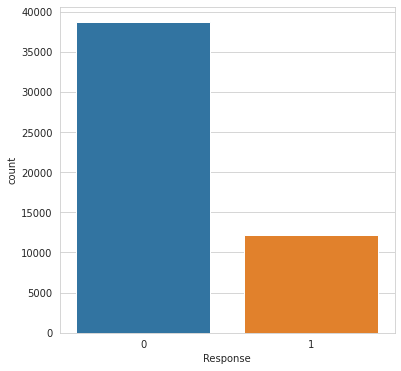

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(df.Response)

In [30]:
df.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [31]:
missing_value=pd.DataFrame(df.isnull().sum())/len(df)*100
missing_value

,0
ID,0.000000
City_Code,0.000000
Region_Code,0.000000
Accomodation_Type,0.000000
Reco_Insurance_Type,0.000000
Upper_Age,0.000000
Lower_Age,0.000000
Is_Spouse,0.000000
Health Indicator,22.976691
Holding_Policy_Duration,39.799929


**Replacing The Health Indicator, Holding_Policy_Duration & Holding_Policy_Type  Columns**

In [32]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [33]:
# Mapping {'14+' with '15'}
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].replace('14+', 15)

In [34]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [35]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [36]:
df['Holding_Policy_Duration'].mode()

0    1.0
dtype: object

In [37]:
from sklearn.impute import SimpleImputer

impute_size=SimpleImputer(strategy='most_frequent')
df['Health Indicator']       =impute_size.fit_transform(df[['Health Indicator']])
df['Holding_Policy_Type']    =impute_size.fit_transform(df[['Holding_Policy_Type']])
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0])

In [38]:
missing_value=pd.DataFrame(df.isnull().sum())/len(df)*100
missing_value

,0
ID,0.0
City_Code,0.0
Region_Code,0.0
Accomodation_Type,0.0
Reco_Insurance_Type,0.0
Upper_Age,0.0
Lower_Age,0.0
Is_Spouse,0.0
Health Indicator,0.0
Holding_Policy_Duration,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         50882 non-null  object 
 9   Holding_Policy_Duration  50882 non-null  object 
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [40]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
objectlist=df.select_dtypes(include='O').columns

for i in objectlist:
  df[i]=le.fit_transform(df[i].astype(str))

In [41]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,6,3.0,22,11628.0,0
1,2,31,1117,0,1,75,22,0,1,0,3.0,22,30510.0,0
2,3,31,3732,0,0,32,32,0,0,0,1.0,19,7450.0,1
3,4,16,4378,0,1,52,48,0,0,6,3.0,19,17780.0,0
4,5,34,2190,1,0,44,44,0,1,8,1.0,16,10404.0,0


In [42]:
for i in df.columns:
  df[i]=df[i].astype(int)

df.dtypes

ID                         int64
City_Code                  int64
Region_Code                int64
Accomodation_Type          int64
Reco_Insurance_Type        int64
Upper_Age                  int64
Lower_Age                  int64
Is_Spouse                  int64
Health Indicator           int64
Holding_Policy_Duration    int64
Holding_Policy_Type        int64
Reco_Policy_Cat            int64
Reco_Policy_Premium        int64
Response                   int64
dtype: object

**I'm trying to consider only 'Reco_Policy_Premium' column for outliers because it's the only column which deals with money and allother columns belongs to ID, Age Duration Etc**

In [46]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,6,3,22,11628,0
1,2,31,1117,0,1,75,22,0,1,0,3,22,30510,0
2,3,31,3732,0,0,32,32,0,0,0,1,19,7450,1
3,4,16,4378,0,1,52,48,0,0,6,3,19,17780,0
4,5,34,2190,1,0,44,44,0,1,8,1,16,10404,0


In [44]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).sum()

ID                             0
City_Code                      0
Region_Code                  201
Accomodation_Type              0
Reco_Insurance_Type        10346
Upper_Age                      0
Lower_Age                      0
Is_Spouse                   8422
Health Indicator             337
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium          821
Response                   12209
dtype: int64

In [45]:
columns=['Reco_Policy_Premium','Response','Reco_Insurance_Type','Is_Spouse','Health Indicator']
for i in columns:
  q75,q25=np.percentile(df[i],[75,25])
  iqr=q75-q25
  minimum=q25-1.5*iqr
  maxmium=q75+1.5*iqr
  df.iloc[df[i] < minimum, i]=minimum
  df.iloc[df[i] > maximum, i]=maximum

IndexError: ignored